# Uproot, Awkward Array, hist, Vector: from basics to combinatorics

This is an introduction to doing particle physics analysis with Scikit-HEP tools: Uproot, Awkward Array, hist, and Vector.

It starts at a basic level—exploring files, making plots—and ramps up to resolving e⁺e⁻e⁺e⁻, μ⁺μ⁻μ⁺μ⁻, and e⁺e⁻μ⁺μ⁻ final states in Higgs decays.

Due to time constraints, this is not a tutorial with exercises for you to try. But I've given 10 such tutorials in the modern era (Awkward Array version ≥ 1), which you can find online, and 5 are on YouTube.

| <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> |
|:--|:--|:--|:--|:--|
| 2020 | EIC collaboration tutorial | | [notebooks](https://github.com/jpivarski-talks/2020-04-08-eic-jlab#readme) | [video](https://www.youtube.com/watch?v=FoxNS6nlbD0) |
| 2020 | CMS HATS tutorial | | [notebooks](https://github.com/jpivarski/2020-06-08-uproot-awkward-columnar-hats#readme) | |
| 2020 | SciPy talk | non-HEP | [notebooks](https://github.com/jpivarski-talks/2020-07-06-scipy2020/blob/master/bikeroutes-execution.ipynb) | [video](https://youtu.be/WlnUF3LRBj4) |
| 2020 | PyHEP tutorial | | [notebooks](https://github.com/jpivarski/2020-07-13-pyhep2020-tutorial#readme) | [video](https://youtu.be/ea-zYLQBS4U) |
| 2021 | CMS HATS tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-06-14-uproot-awkward-columnar-hats#readme) | |
| 2021 | PyHEP tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-07-06-pyhep-uproot-awkward-tutorial#readme) | [video](https://youtu.be/s47Nz0h0vcg) |
| 2021 | STAR collaboration tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-09-13-star-uproot-awkward-tutorial#readme) | |
| 2022 | PyHEP topical meeting | | [notebooks](https://indico.cern.ch/event/1140031/) | |
| 2022 | SciPy tutorial | non-HEP | [notebooks](https://github.com/jpivarski-talks/2022-07-11-scipy-loopy-tutorial#readme) | [video](https://youtu.be/Dovyd72eD70) |
| 2022 | CoDaS-HEP tutorial | | [notebooks](https://github.com/jpivarski-talks/2022-08-03-codas-hep-columnar-tutorial#readme) | |

Also, there are [HSF training events](https://hepsoftwarefoundation.org/Schools/events.html), featuring an [Uproot module](https://hsf-training.github.io/hsf-training-uproot-webpage/) and a [Scikit-HEP module](https://hsf-training.github.io/hsf-training-scikit-hep-webpage/).

And, of course, each of these libraries has online documentation:

- Uproot documentation at [https://uproot.readthedocs.io/](https://uproot.readthedocs.io/)
- Awkward Array documentation at [https://awkward-array.org/](https://awkward-array.org/)
- hist documentation at [https://hist.readthedocs.io/](https://hist.readthedocs.io/)
- Vector documentation at [https://vector.readthedocs.io/](https://vector.readthedocs.io/)

<br><br><br><br><br>

This presentation uses the current versions of Uproot, Awkward Array, hist, and Vector that you would get from pip:

```bash
pip install numpy matplotlib uproot awkward hist[plot] vector
```

Note that new major versions are in development, to be released in December 2022 (Uproot 5.0, Awkward Array 2.0, and Vector 1.0), but the code in this notebook will still work in the new versions. (The outputs will look a little different—better!)

In [1]:
import numpy as np
np.__version__

'1.22.4'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.5.3'

In [3]:
import uproot
uproot.__version__

'4.3.5'

In [4]:
import awkward as ak
ak.__version__

'1.9.0'

In [5]:
import hist
hist.__version__

'2.6.1'

In [6]:
import vector
vector.__version__

'0.10.0'

<br><br><br><br><br>

## Overview

Just as in the broader Python world, functionality in Scikit-HEP is provided by small, specialized, interoperating libraries that build on each other.

<table width="1200px"><tr style="background: white">
    <td align="center" width="50%" style="font-size: 24px; font-weight: bold">Scientific Python ecosystem</td>
    <td align="center" width="50%" style="font-size: 24px; font-weight: bold">Scikit-HEP ecosystem</td>
</tr><tr style="background: white">
    <td align="center" width="50%"><img src="img/shells-border.png" width="95%"></td>
    <td align="center" width="50%"><img src="img/shells-hep.svg" width="95%"></td>
</tr></table>

<br><br>

<img src="img/uproot-logo.png" width="350px">

<p style="font-size: 14pt">Reads ROOT data as <span style="background: yellow">arrays</span>.</p>

<br><br>

<img src="img/awkward-logo.png" width="350px">

<p style="font-size: 14pt">Manipulates <span style="background: yellow">arrays</span> of arbitrary data structures.</p>

<br><br>

<img src="img/hist-logo.png" width="300px">

<p style="font-size: 14pt">Fills histograms from <span style="background: yellow">arrays</span> of data.</p>

<br><br>

<img src="img/vector-logo.png" width="350px">

<p style="font-size: 14pt">Transforms <span style="background: yellow">arrays</span> of 2D, 3D, and Lorentz vectors.</p>

<br><br>

_Using them effectively will require thinking about whole arrays at a time._

<br><br><br>

## Array-at-a-time thinking and interactivity

There's a long history of "array-oriented" languages, in which the fundamental data type is an array and most functions operate on arrays.

<img src="img/apl-timeline.svg" width="800">

<br><br><br>

Interestingly enough, all of these (except Fortran 90 and Dex) are _interactive_, command-line or notebook-driven languages.

<br>

They work especially well for studying _distributions of datasets_ and debugging intermediate values of _whole datasets_, not _individual entries_.

<br><br>

For example, suppose we start with a Gaussian-distributed dataset.

In [7]:
dataset = np.random.normal(0, 1, 1000000)  # one MILLION data points

<br><br>

You ask, "How are they distributed?"

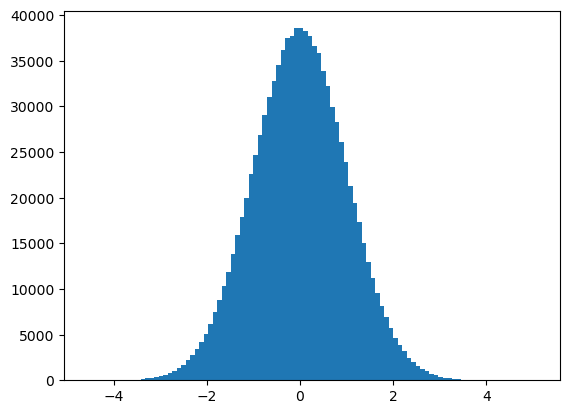

In [8]:
plt.hist(dataset, bins=100);

<br><br>

"How is the square of each point distributed?"

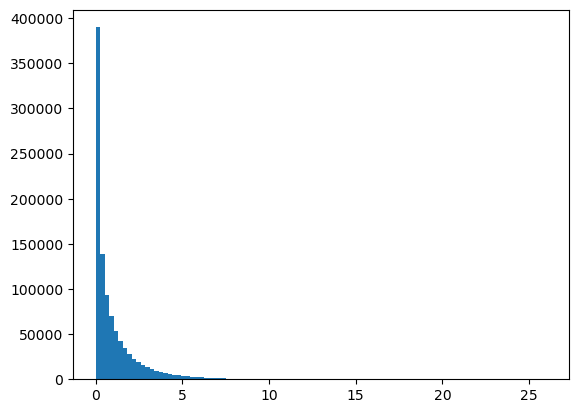

In [9]:
plt.hist(dataset**2, bins=100);

<br><br>

"What about this weirdo function? $\sin\left(\frac{1}{x^2}\right)$"

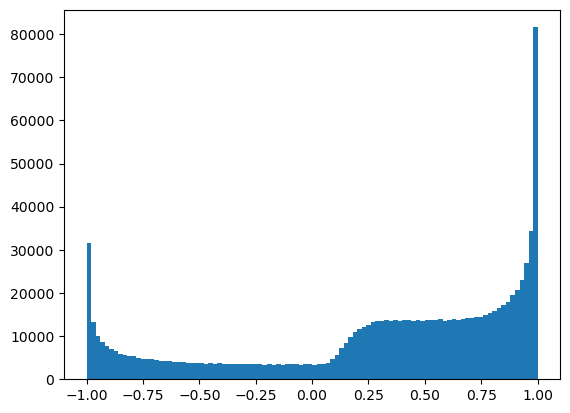

In [10]:
plt.hist(np.sin(1/dataset**2), bins=100);

<br><br>

The shape of the last distribution would have been hard to guess, and as long as we're in "compute operation, plot, compute operation, plot" mode, setting up `for` loops would be a hindrance.

<br><br>

Array-oriented computations and interactivity go together. If you don't like Jupyter, consider IPython, the basic Python prompt, or IDE features that let you interact with an ongoing session. Don't build up a long-running script by running the whole thing over and over until you've already figured out the details of your project.

<br><br><br><br><br>

## Exploring a file with Uproot

Uproot is a reimplementation of ROOT I/O in Python, with no dependence on C++ ROOT.

<img src="img/abstraction-layers.svg" width="800">

<br><br><br>

"Where's my file?"

(Executing shell commands with `!` is a Jupyter/IPython thing.)

In [11]:
!ls -l

total 984
drwxr-xr-x   3 jpivarski  staff      96 Sep 11 12:48 data
drwxr-xr-x  12 jpivarski  staff     384 Sep 11 16:23 img
-rw-r--r--   1 jpivarski  staff  502506 Sep 11 17:44 pyhep2022-uproot-and-awkward-array.ipynb


In [12]:
!ls -l data

total 82816
-rw-r--r--  1 jpivarski  staff  42400229 Sep 11 12:48 SMHiggsToZZTo4L.root


<br><br>

"Open it in Uproot."

In [13]:
file = uproot.open("data/SMHiggsToZZTo4L.root")
file

<ReadOnlyDirectory '/' at 0x00011c9f2740>

<br><br>

"What's in the file?"

In [14]:
file.keys()

['Events;1']

<br><br>

"What kind of object is 'Events'?"

In [15]:
file.classnames()

{'Events;1': 'TTree'}

<br><br>

"Get the TTree metadata (not the whole arrays; not yet)."

In [16]:
tree = file["Events"]
tree

<TTree 'Events' (32 branches) at 0x000105e37c40>

In [17]:
tree.num_entries

299973

<br><br>

"What kinds of data are in the TTree?"

In [18]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
PV_npvs              | int32_t                  | AsDtype('>i4')
PV_x                 | float                    | AsDtype('>f4')
PV_y                 | float                    | AsDtype('>f4')
PV_z                 | float                    | AsDtype('>f4')
nMuon                | uint32_t                 | AsDtype('>u4')
Muon_pt              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_eta             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_phi             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_mass            | float[]                  | AsJagged(AsDtype('>f4'))
Muon_charge       

<br><br>

"Can I get that information programmatically?"

(Yes.)

In [19]:
{key: branch.typename for key, branch in tree.items()}

{'run': 'int32_t',
 'luminosityBlock': 'uint32_t',
 'event': 'uint64_t',
 'PV_npvs': 'int32_t',
 'PV_x': 'float',
 'PV_y': 'float',
 'PV_z': 'float',
 'nMuon': 'uint32_t',
 'Muon_pt': 'float[]',
 'Muon_eta': 'float[]',
 'Muon_phi': 'float[]',
 'Muon_mass': 'float[]',
 'Muon_charge': 'int32_t[]',
 'Muon_pfRelIso03_all': 'float[]',
 'Muon_pfRelIso04_all': 'float[]',
 'Muon_dxy': 'float[]',
 'Muon_dxyErr': 'float[]',
 'Muon_dz': 'float[]',
 'Muon_dzErr': 'float[]',
 'nElectron': 'uint32_t',
 'Electron_pt': 'float[]',
 'Electron_eta': 'float[]',
 'Electron_phi': 'float[]',
 'Electron_mass': 'float[]',
 'Electron_charge': 'int32_t[]',
 'Electron_pfRelIso03_all': 'float[]',
 'Electron_dxy': 'float[]',
 'Electron_dxyErr': 'float[]',
 'Electron_dz': 'float[]',
 'Electron_dzErr': 'float[]',
 'MET_pt': 'float',
 'MET_phi': 'float'}

<br><br>

"Read the muon $p_T$, $\eta$, $\phi$, mass, and charge into arrays (and only those columns/fields)."

This is the first _expensive_ operation in our tutorial. If this were a large file, you'd have to wait.

In [20]:
muon_kinematics = tree.arrays(["Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass", "Muon_charge"])
muon_kinematics

<Array [{Muon_pt: [63, ... Muon_charge: []}] type='299973 * {"Muon_pt": var * fl...'>

<br><br>

Note that there's a way to limit how much you read/how long you have to wait:

In [21]:
tree.arrays(entry_start=0, entry_stop=100)

<Array [{run: 1, ... MET_phi: -2.27}] type='100 * {"run": int32, "luminosityBloc...'>

<br><br>

This is an Awkward Array. NumPy can't represent this dataset because there's a different number of muons in each event, and NumPy deals with rectilinear arrays (tensors) only.

In [22]:
muon_kinematics[:4].to_list()

[{'Muon_pt': [63.04386901855469, 38.12034606933594, 4.04868745803833],
  'Muon_eta': [-0.7186822295188904, -0.8794569969177246, -0.320764422416687],
  'Muon_phi': [2.968005895614624, -1.0324749946594238, 1.0385035276412964],
  'Muon_mass': [0.10565836727619171, 0.10565836727619171, 0.10565836727619171],
  'Muon_charge': [1, -1, 1]},
 {'Muon_pt': [],
  'Muon_eta': [],
  'Muon_phi': [],
  'Muon_mass': [],
  'Muon_charge': []},
 {'Muon_pt': [],
  'Muon_eta': [],
  'Muon_phi': [],
  'Muon_mass': [],
  'Muon_charge': []},
 {'Muon_pt': [54.33274841308594,
   23.515281677246094,
   52.87107467651367,
   4.328588962554932,
   5.347753524780273,
   8.393385887145996,
   3.4901235103607178],
  'Muon_eta': [-1.0582748651504517,
   -0.2475155144929886,
   -0.02654244937002659,
   0.766690194606781,
   -1.0196707248687744,
   -0.9219240546226501,
   0.7694917321205139],
  'Muon_phi': [-0.36231091618537903,
   -0.30678591132164,
   1.3224546909332275,
   2.0202531814575195,
   -0.7902992367744446,
 

<br><br>

"Extract columns/fields from the already-read data."

In [23]:
muon_kinematics.fields

['Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']

In [24]:
muon_kinematics.Muon_pt

<Array [[63, 38.1, 4.05], ... 4.75], [], []] type='299973 * var * float32'>

In [25]:
muon_kinematics.Muon_eta

<Array [[-0.719, -0.879, -0.321], ... [], []] type='299973 * var * float32'>

In [26]:
muon_kinematics.Muon_phi

<Array [[2.97, -1.03, 1.04], ... [], []] type='299973 * var * float32'>

In [27]:
muon_kinematics.Muon_mass

<Array [[0.106, 0.106, 0.106], ... [], []] type='299973 * var * float32'>

In [28]:
muon_kinematics.Muon_charge

<Array [[1, -1, 1], [], ... 1, 1], [], []] type='299973 * var * int32'>

<br><br>

"What is the data type?"

In [29]:
print(muon_kinematics.type)

299973 * {"Muon_pt": var * float32, "Muon_eta": var * float32, "Muon_phi": var * float32, "Muon_mass": var * float32, "Muon_charge": var * int32}


In [30]:
print(muon_kinematics.Muon_pt.type)

299973 * var * float32


<br><br>

Back to Uproot:

"Which columns in the TTree have anything to do with muons or electrons?"

In [31]:
tree.keys(filter_name=["Muon_*", "Electron_*"])

['Muon_pt',
 'Muon_eta',
 'Muon_phi',
 'Muon_mass',
 'Muon_charge',
 'Muon_pfRelIso03_all',
 'Muon_pfRelIso04_all',
 'Muon_dxy',
 'Muon_dxyErr',
 'Muon_dz',
 'Muon_dzErr',
 'Electron_pt',
 'Electron_eta',
 'Electron_phi',
 'Electron_mass',
 'Electron_charge',
 'Electron_pfRelIso03_all',
 'Electron_dxy',
 'Electron_dxyErr',
 'Electron_dz',
 'Electron_dzErr']

<br><br>

"Read all of those columns into arrays, using the same `filter_name`."

In [32]:
muons_and_electrons = tree.arrays(filter_name=["Muon_*", "Electron_*"])
muons_and_electrons

<Array [{Muon_pt: [63, 38.1, ... 0.00558]}] type='299973 * {"Muon_pt": var * flo...'>

(Test a `filter_name` with `tree.keys`, then use it with `tree.arrays`.)

<br><br>

"Show me the type of this larger dataset."

In [33]:
print(muons_and_electrons.type)

299973 * {"Muon_pt": var * float32, "Muon_eta": var * float32, "Muon_phi": var * float32, "Muon_mass": var * float32, "Muon_charge": var * int32, "Muon_pfRelIso03_all": var * float32, "Muon_pfRelIso04_all": var * float32, "Muon_dxy": var * float32, "Muon_dxyErr": var * float32, "Muon_dz": var * float32, "Muon_dzErr": var * float32, "Electron_pt": var * float32, "Electron_eta": var * float32, "Electron_phi": var * float32, "Electron_mass": var * float32, "Electron_charge": var * int32, "Electron_pfRelIso03_all": var * float32, "Electron_dxy": var * float32, "Electron_dxyErr": var * float32, "Electron_dz": var * float32, "Electron_dzErr": var * float32}


<br><br><br><br><br>

## Examining distributions with hist

NumPy and Matplotlib both have `histogram` (or `hist`) functions, but these are _display_ options. In particle physics, we almost always want a histogram object that we can fill in parallel, redraw without refilling, etc. Even weighted histograms with error bars require more than what NumPy and Matplotlib give us.

So although

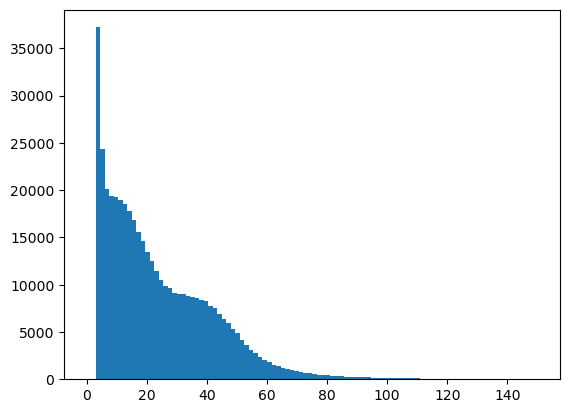

In [34]:
plt.hist(ak.flatten(muon_kinematics.Muon_pt), bins=100, range=(0, 150));

works, you probably want to use the hist library:

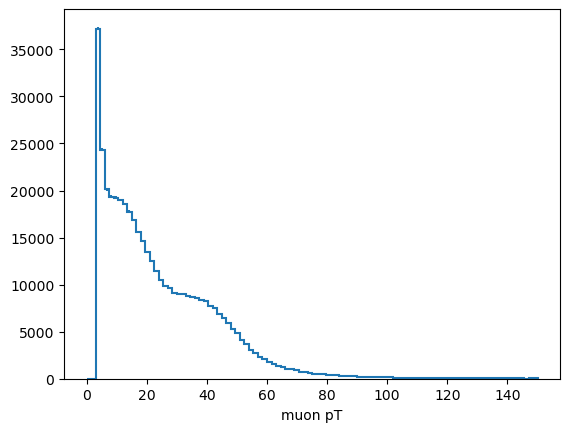

In [35]:
h = hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()

h.fill(ak.flatten(muon_kinematics.Muon_pt))

h.plot();

<br><br><br>

Or even

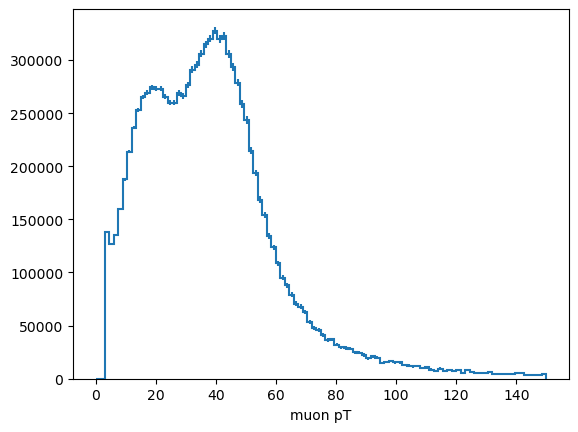

In [36]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Weight()
        .fill(
            ak.flatten(muon_kinematics.Muon_pt),
            weight=ak.flatten(muon_kinematics.Muon_pt),
        )
        .plot()
);

<br><br><br>

### Why `ak.flatten`?

In both of the above examples, we didn't just plot

In [37]:
muon_kinematics.Muon_pt

<Array [[63, 38.1, 4.05], ... 4.75], [], []] type='299973 * var * float32'>

but

In [38]:
ak.flatten(muon_kinematics.Muon_pt)

<Array [63, 38.1, 4.05, ... 4.36, 5.63, 4.75] type='441394 * float32'>

<br><br>

The first array is an array of _lists_. To fill a histogram, you need an array of _numbers_. `ak.flatten` removes the list structure.

<br><br>

There are other ways of removing the list structure, depending on what you're trying to do:

In [39]:
ak.sum(muon_kinematics.Muon_pt, axis=1)

<Array [105, 0, 0, 152, ... 75.6, 19.1, 0, 0] type='299973 * float32'>

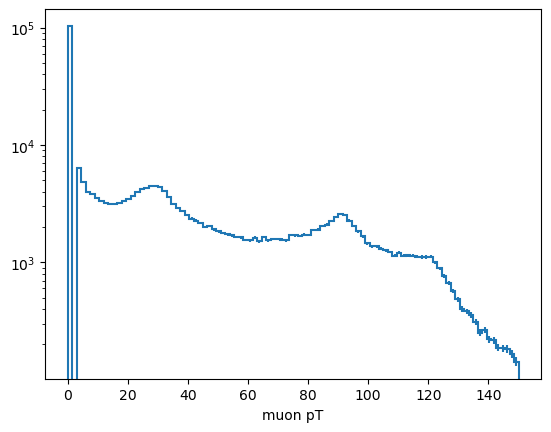

In [40]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.sum(muon_kinematics.Muon_pt, axis=1))
        .plot()
);
plt.yscale("log");

<br><br>

In [41]:
ak.max(muon_kinematics.Muon_pt, axis=1)

<Array [63, None, None, ... 5.63, None, None] type='299973 * ?float32'>

In [42]:
ak.fill_none(ak.max(muon_kinematics.Muon_pt, axis=1), 0)

<Array [63, 0, 0, 54.3, ... 43.1, 5.63, 0, 0] type='299973 * float64'>

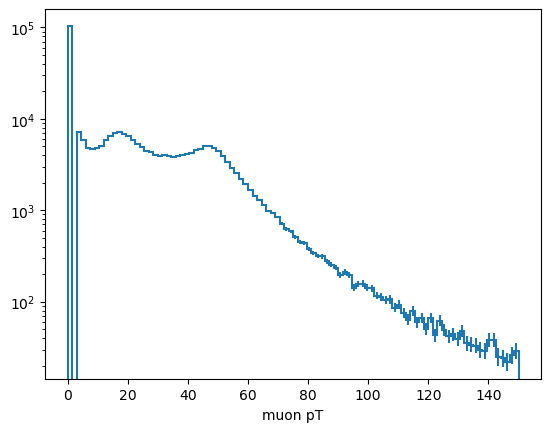

In [43]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.fill_none(ak.max(muon_kinematics.Muon_pt, axis=1), 0))
        .plot()
);
plt.yscale("log");

<br><br><br><br><br>

## Computing vector coordinates

We can compute coordinate transformations and invariant masses manually, using NumPy's array-at-a-time functions.

In [44]:
px = muon_kinematics.Muon_pt * np.cos(muon_kinematics.Muon_phi)
py = muon_kinematics.Muon_pt * np.sin(muon_kinematics.Muon_phi)
pz = muon_kinematics.Muon_pt * np.sinh(muon_kinematics.Muon_eta)

In [45]:
px

<Array [[-62.1, 19.5, 2.05], ... [], []] type='299973 * var * float32'>

In [46]:
py

<Array [[10.9, -32.7, 3.49], ... [], []] type='299973 * var * float32'>

In [47]:
pz

<Array [[-49.3, -38, -1.32], ... [], []] type='299973 * var * float32'>

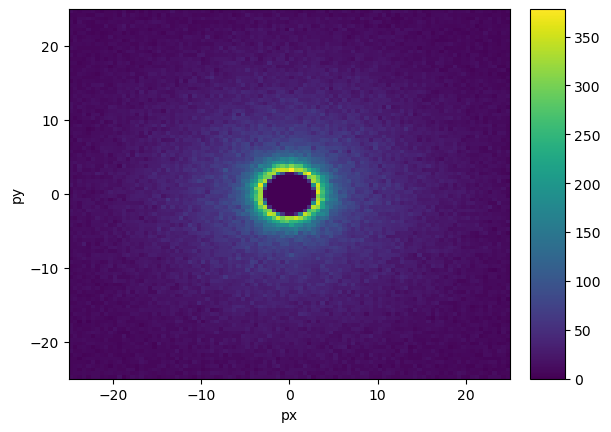

In [48]:
(
    hist.Hist.new.Regular(100, -25, 25, name="px").Regular(100, -25, 25, name="py").Double()
        .fill(ak.flatten(px), ak.flatten(py))
        .plot()
);

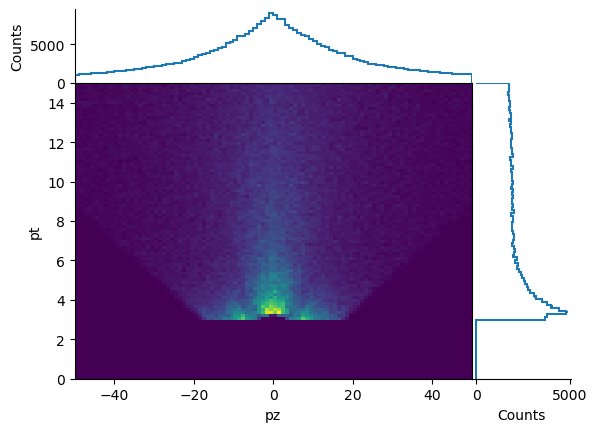

In [49]:
(
    hist.Hist.new.Regular(100, -50, 50, name="pz").Regular(100, 0, 15, name="pt").Double()
        .fill(ak.flatten(pz), ak.flatten(np.sqrt(px**2 + py**2)))
        .plot2d_full()
);

<br><br><br>

But I bet you'd rather use the Vector library.

In [50]:
muons = vector.arr(
    ak.zip({
        "pt": muon_kinematics.Muon_pt,
        "eta": muon_kinematics.Muon_eta,
        "phi": muon_kinematics.Muon_phi,
        "mass": muon_kinematics.Muon_mass,
        "charge": muon_kinematics.Muon_charge,  # not necessary for vector
    })
)
muons

<MomentumArray4D [[{rho: 63, phi: 2.97, ... [], []] type='299973 * var * Momentu...'>

<br><br><br>

Note that each `Momentum4D` vector has a single numerical value for each coordinate:

In [51]:
print(muons[0])

[{rho: 63, phi: 2.97, eta: -0.719, tau: 0.106, ... tau: 0.106, charge: 1}]


whereas the original `muon_kinematics` had _lists_ of each coordinate:

In [52]:
print(muon_kinematics[0])

... 2.97, -1.03, 1.04], Muon_mass: [0.106, 0.106, 0.106], Muon_charge: [1, -1, 1]}


<br><br><br>

That's what the `ak.zip` function does: it combines nested lists of the same lengths into lists of records.

In [53]:
print(ak.Array({"a": [[1, 2], [], [3]], "b": [[1.1, 2.2], [], [3.3]]}))

[{a: [1, 2], b: [1.1, 2.2]}, {a: [], b: []}, {a: [3], b: [3.3]}]


In [54]:
print(ak.zip({"a": [[1, 2], [], [3]], "b": [[1.1, 2.2], [], [3.3]]}))

[[{a: 1, b: 1.1}, {a: 2, b: 2.2}], [], [{a: 3, b: 3.3}]]


<br><br><br>

The other function, `vector.arr`, interprets records with specially named fields as coordinates of vectors.

In [55]:
vector.arr([[{"x": 1, "y": 1.1}, {"x": 2, "y": 2.2}], [], [{"x": 3, "y": 3.3}]])

<VectorArray2D [[{x: 1, y: 1.1}, ... x: 3, y: 3.3}]] type='3 * var * Vector2D["x...'>

In [56]:
vector.arr([[{"px": 1, "py": 1.1}, {"px": 2, "py": 2.2}], [], [{"px": 3, "py": 3.3}]])

<MomentumArray2D [[{x: 1, y: 1.1}, ... x: 3, y: 3.3}]] type='3 * var * Momentum2...'>

<br><br><br>

Arrays of vectors have methods and properties to convert between coordinates.

In [57]:
muons.px

<Array [[-62.1, 19.5, 2.05], ... [], []] type='299973 * var * float32'>

In [58]:
muons.py

<Array [[10.9, -32.7, 3.49], ... [], []] type='299973 * var * float32'>

In [59]:
muons.pz

<Array [[-49.3, -38, -1.32], ... [], []] type='299973 * var * float32'>

In [60]:
muons.energy

<Array [[80, 53.8, 4.26], ... 18.2], [], []] type='299973 * var * float32'>

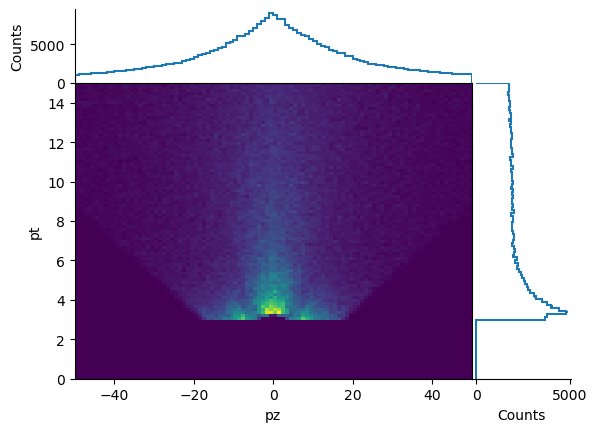

In [61]:
(
    hist.Hist.new.Regular(100, -50, 50, name="pz").Regular(100, 0, 15, name="pt").Double()
        .fill(ak.flatten(muons.pz), ak.flatten(muons.pt))
        .plot2d_full()
);

<br><br><br><br><br>

## Reconstructing the Z boson mass

Now let's do some analysis-like stuff.

If two muons are the decay products of a Z boson, the mass of the sum of those two muons is the Z boson mass.

In [62]:
muons[0, 0]

<MomentumRecord4D ... tau: 0.106, charge: 1} type='Momentum4D["rho": float32, "p...'>

In [63]:
muons[0, 1]

<MomentumRecord4D ... tau: 0.106, charge: -1} type='Momentum4D["rho": float32, "...'>

In [64]:
(muons[0, 0] + muons[0, 1]).mass

89.4919204711914

<br><br><br>

We can vectorize this calculation by selecting all events (first dimension) and only muon number `0` or `1` (second dimension).

In [65]:
muons[:, 0], muons[:, 1]

ValueError: in ListOffsetArray64 attempting to get 0, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.9.0/src/cpu-kernels/awkward_NumpyArray_getitem_next_at.cpp#L21)

<br><br><br>

It didn't work because some events don't have two—or even one—muon.

<br><br><br>

"How many muons does each event have?"

In [66]:
ak.num(muons)

<Array [3, 0, 0, 7, 0, 2, ... 0, 2, 2, 4, 0, 0] type='299973 * int64'>

<br><br><br>

"Which events have at least two muons?"

In [67]:
ak.num(muons) >= 2

<Array [True, False, False, ... False, False] type='299973 * bool'>

<br><br><br>

"Select events with at least two muons."

In [68]:
at_least_2 = muons[ak.num(muons) >= 2]

ak.num(at_least_2)

<Array [3, 7, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 4] type='145597 * int64'>

(Notice that there are fewer of these events.)

<br><br><br>

Now we can get the first and second muons of these events.

In [69]:
mu1 = at_least_2[:, 0]
mu2 = at_least_2[:, 1]

<br><br><br>

And compute the invariant mass.

In [70]:
(mu1 + mu2).mass

<Array [89.5, 29.8, 87.1, ... 27.9, 90.5, 2.4] type='145597 * float32'>

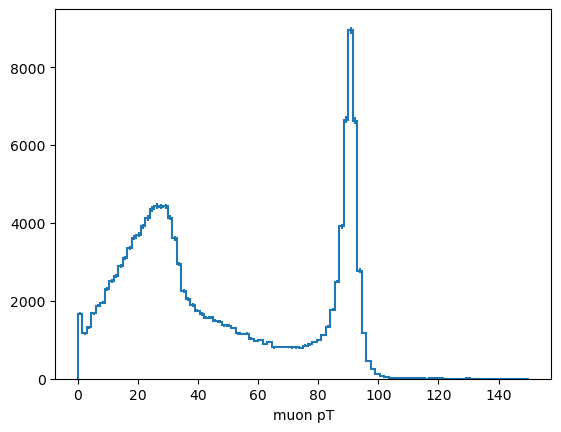

In [71]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill((mu1 + mu2).mass)
        .plot()
);

Question to ponder: why did the above not need an `ak.flatten`?

<br><br><br><br><br>

### Physics cuts: opposite sign muons

In the above, we included all first and second muons, regardless of whether they are μ⁺μ⁻, μ⁺μ⁺, or μ⁻μ⁻. Only μ⁺μ⁻ can be decay products of a Z boson.

<br><br><br>

"Which of `mu1` and `mu2` have opposite charges?"

In [72]:
opposite_charges = mu1.charge != mu2.charge
opposite_charges

<Array [True, True, True, ... True, True, True] type='145597 * bool'>

<br><br><br>

"What does the distribution look like if we only use the pairs with opposite charges?"

In [73]:
(mu1[opposite_charges] + mu2[opposite_charges]).mass

<Array [89.5, 29.8, 87.1, ... 27.9, 90.5, 2.4] type='122744 * float32'>

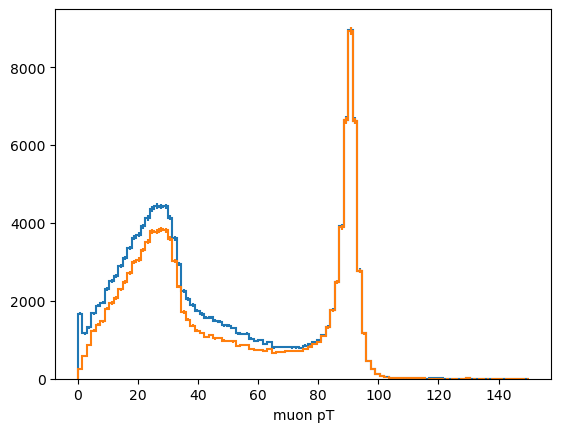

In [74]:
# without a cut (blue)
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill((mu1 + mu2).mass)
        .plot()
);
# with a cut (orange)
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill((mu1[opposite_charges] + mu2[opposite_charges]).mass)
        .plot()
);

<br><br><br><br><br>

## Particle combinatorics

In the above, we selected the first and second muons from each event, though many events have more than two good muons.

What if the Z boson decays into muons `1` and `3`, instead of `0` and `1`? Or any other pair from {`0`, `1`, `2`, `3`}?

<br><br><br>

Awkward Array has two combinatorial primitives:

<table style="margin-left: 0px">
    <tr style="background: white"><td style="font-size: 1.75em; font-weight: bold; text-align: center"><a href="https://awkward-array.readthedocs.io/en/latest/_auto/ak.cartesian.html">ak.cartesian</a></td><td style="font-size: 1.75em; font-weight: bold; text-align: center"><a href="https://awkward-array.readthedocs.io/en/latest/_auto/ak.combinations.html">ak.combinations</a></td></tr>
    <tr style="background: white"><td><img src="img/cartoon-cartesian.svg" width="300"></td><td><img src="img/cartoon-combinations.svg" width="300"></td></tr>
</table>

In [75]:
cartesian_example = ak.cartesian(([[1, 2, 3], [], [4]], [["a", "b"], ["c"], ["d", "e"]]))
cartesian_example.tolist()

[[(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b'), (3, 'a'), (3, 'b')],
 [],
 [(4, 'd'), (4, 'e')]]

In [76]:
combinations_example = ak.combinations([[1.1, 2.2, 3.3, 4.4], [], [5.5, 6.6]], 2)
combinations_example.tolist()

[[(1.1, 2.2), (1.1, 3.3), (1.1, 4.4), (2.2, 3.3), (2.2, 4.4), (3.3, 4.4)],
 [],
 [(5.5, 6.6)]]

<br><br><br>

Note that these are creating new 2-tuple structures (parentheses), not lists (square brackets).

Tuples can be separated, array-wise, with [ak.unzip](https://awkward-array.readthedocs.io/en/latest/_auto/ak.unzip.html).

In [77]:
lefts, rights = ak.unzip(cartesian_example)

In [78]:
lefts

<Array [[1, 1, 2, 2, 3, 3], [], [4, 4]] type='3 * var * int64'>

In [79]:
rights

<Array [['a', 'b', 'a', 'b', ... ['d', 'e']] type='3 * var * string'>

In [80]:
ak.num(lefts), ak.num(rights)

(<Array [6, 0, 2] type='3 * int64'>, <Array [6, 0, 2] type='3 * int64'>)

<br><br>

In [81]:
lefts, rights = ak.unzip(combinations_example)

In [82]:
lefts

<Array [[1.1, 1.1, 1.1, 2.2, ... [], [5.5]] type='3 * var * float64'>

In [83]:
rights

<Array [[2.2, 3.3, 4.4, 3.3, ... [], [6.6]] type='3 * var * float64'>

In [84]:
ak.num(lefts), ak.num(rights)

(<Array [6, 0, 1] type='3 * int64'>, <Array [6, 0, 1] type='3 * int64'>)

<br><br><br>

Applying [ak.combinations](https://awkward-array.readthedocs.io/en/latest/_auto/ak.combinations.html) to `muons`, we get every muon pair from each event.

We don't even need to restrict ourselves to events with at least two muons.

In [85]:
mu1, mu2 = ak.unzip(ak.combinations(muons, 2))

In [86]:
mu1

<MomentumArray4D [[{rho: 63, phi: 2.97, ... [], []] type='299973 * var * Momentu...'>

In [87]:
mu2

<MomentumArray4D [[{rho: 38.1, phi: -1.03, ... [], []] type='299973 * var * Mome...'>

<br><br>

Invariant mass and plot...

In [88]:
(mu1 + mu2).mass

<Array [[89.5, 27, 22.5], ... [], []] type='299973 * var * float32'>

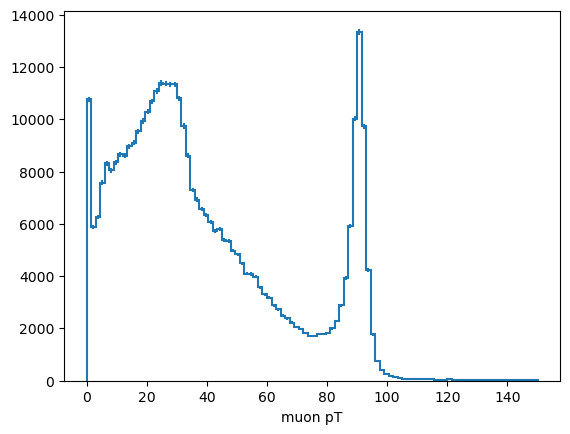

In [89]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.flatten((mu1 + mu2).mass))
        .plot()
);

<br><br>

Now for the opposite charge cut...

In [90]:
opposite_charges = mu1.charge != mu2.charge

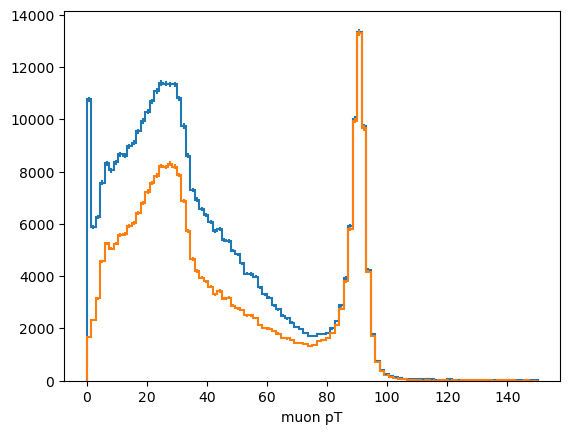

In [91]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.flatten((mu1 + mu2).mass))
        .plot()
);
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.flatten((mu1[opposite_charges] + mu2[opposite_charges]).mass))
        .plot()
);

In Higgs → ZZ, only one of the two Z bosons has a mass of 91 GeV.

The other is "off-shell," a "virtual" boson.

<br><br><br><br><br>

## Higgs mass in μ⁺μ⁻μ⁺μ⁻

When a Higgs decays into 4 muons, we don't need to know which Z boson is which.

(If you want to try that exercise, see the [CoDaS-HEP 2022 tutorial](https://github.com/jpivarski-talks/2022-08-03-codas-hep-columnar-tutorial#readme).)

The Higgs mass is formed from a combination of 4 muons.

In [92]:
mu1, mu2, mu3, mu4 = ak.unzip(ak.combinations(muons, 4))

In [93]:
mu1

<MomentumArray4D [[], [], [], ... charge: 1}], [], []] type='299973 * var * Mome...'>

In [94]:
mu2

<MomentumArray4D [[], [], [], ... [], []] type='299973 * var * Momentum4D["rho":...'>

In [95]:
mu3

<MomentumArray4D [[], [], [], ... charge: 1}], [], []] type='299973 * var * Mome...'>

In [96]:
mu4

<MomentumArray4D [[], [], [], ... charge: 1}], [], []] type='299973 * var * Mome...'>

In [97]:
(mu1 + mu2 + mu3 + mu4).mass

<Array [[], [], [], [126, ... [4.8], [], []] type='299973 * var * float32'>

<br><br><br>

In [98]:
correct_charge = (mu1.charge + mu2.charge + mu3.charge + mu4.charge) == 0
correct_charge

<Array [[], [], [], [True, ... [False], [], []] type='299973 * var * bool'>

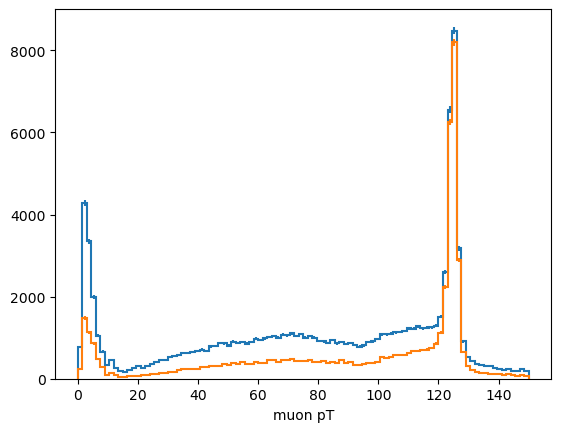

In [99]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.flatten((mu1 + mu2 + mu3 + mu4).mass))
        .plot()
);
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.flatten((mu1[correct_charge] + mu2[correct_charge] + mu3[correct_charge] + mu4[correct_charge]).mass))
        .plot()
);

<br><br><br><br><br>

## Higgs mass in e⁺e⁻e⁺e⁻

The 4 electron case is just like the 4 muon case, but we need to go back to the original file to extract electron quantities.

Do you remember how?

In [100]:
electron_kinematics = tree.arrays(filter_name="Electron_*")
electron_kinematics

<Array [{Electron_pt: [], ... 0.00558]}] type='299973 * {"Electron_pt": var * fl...'>

In [101]:
electrons = vector.arr(
    ak.zip({
        "pt": electron_kinematics.Electron_pt,
        "eta": electron_kinematics.Electron_eta,
        "phi": electron_kinematics.Electron_phi,
        "mass": electron_kinematics.Electron_mass,
        "charge": electron_kinematics.Electron_charge,  # not necessary for vector
    })
)
electrons

<MomentumArray4D [[], [{rho: 21.9, ... charge: 1}]] type='299973 * var * Momentu...'>

In [102]:
e1, e2, e3, e4 = ak.unzip(ak.combinations(electrons, 4))

In [103]:
correct_charge = (e1.charge + e2.charge + e3.charge + e4.charge) == 0
correct_charge

<Array [[], [True], [], [], ... [], [], [], []] type='299973 * var * bool'>

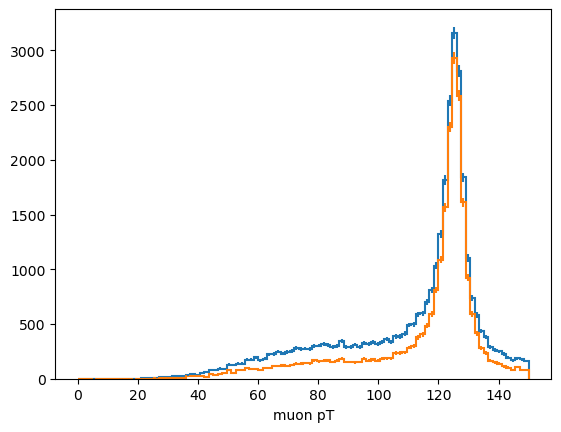

In [104]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.flatten((e1 + e2 + e3 + e4).mass))
        .plot()
);
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.flatten((e1[correct_charge] + e2[correct_charge] + e3[correct_charge] + e4[correct_charge]).mass))
        .plot()
);

<br><br><br><br><br>

## Higgs mass in e⁺e⁻μ⁺μ⁻

It may seem like the mixed case is harder, but it's not (especially if we want to identify intermediate Z bosons).

Each of the 4 particles in the final state is distinguishable.

Electrons and muons often come in different collections, while positive and negative charges often come in the same collection, but there's no reason not to make separate collections for both flavor _and_ charge.

In [105]:
positive_muons = muons[muons.charge > 0]
negative_muons = muons[muons.charge < 0]
positive_electrons = electrons[electrons.charge > 0]
negative_electrons = electrons[electrons.charge < 0]

<br><br><br>

Now we can construct the Higgs mass from a Cartesian product of these four collections.

In [106]:
mu1, mu2, e1, e2 = ak.unzip(
    ak.cartesian([positive_muons, negative_muons, positive_electrons, negative_electrons])
)

<br><br><br>

There's no charge cut to apply.

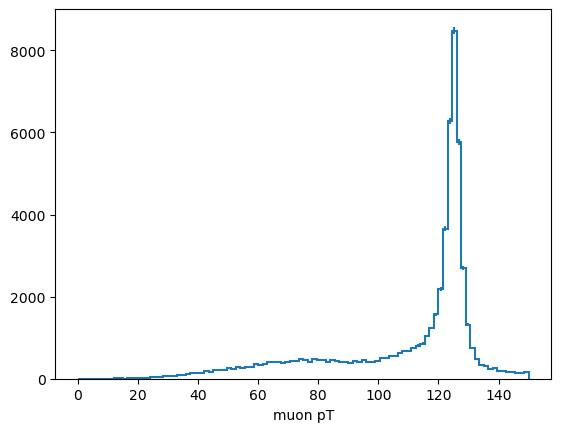

In [107]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.flatten((mu1 + mu2 + e1 + e2).mass))
        .plot()
);


<br><br><br><br><br>

## Questions?

I hope you've enjoyed the tour.

Now—time for questions!